### A Crash Course on Quantum Simulation

#### Week 2-3.

Plan:
A. Basics of Circuit Theory
- Kirshhoff's Laws: Review
- A Lagrangian Formulation
- An Hamiltonian Formulation
B. Basics of Quantum Mechanics
- Schrödinger Equation
- Representations in various basis choices
- Tight-Binding Hamiltonian
Example: Telegraph Equation vs SSH circuit

### A. Basics of Circuit Theory: 

#### Kirschhoff's and Ohm's Laws: 
Kirschoff Laws
- Kirschhoff's 1st Law: Conservation of total charge per unit area and time (current law)
$\sum_i I_i = 0.$

- Kirchhoff's 2nd Law: Conservation of energy per unit charge (voltage law
$\sum_i^{loop} V_i = 0.$

- Ohm's Law: DC current response and voltage across are proportional up to a constant, called R.
$ V = I R$

<img src="KirshhoffCircuit.png" width="320">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Numerical solution

Initiate the libraries:

In [1]:
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

Define the variables (unknowns):

In [2]:
# A python solution (conventional):
vr1, vr2, vr3   = sy.symbols('vr1,vr2,vr3',complex=True)
i1,i2,i3 = sy.symbols('i1,i2,i3',complex=True)

Define the system variables,

In [3]:
# driving frequency for each voltage
omega1 = 0.
omega2 = 0.

# voltage sources
E1 = 10.*sy.cos(omega1)
E2 = 7.*sy.cos(omega2)

# resistors
r1 = 30.
r2 = 100.
r3 = 100.

define equations:
$$I_i = V_i/R_i \quad \to \quad f_i = I_i - V_i/r_i$$

In [4]:
# Ohm's law
eq1 = i1 - vr1/r1
eq2 = i2 - vr2/r2
eq3 = i3 - vr3/r3
# Kirshhoff current law for either of nodes
eq4 = i1-i2-i3
# Kirshhoff voltage law for two loops
eq5 = vr2+E1-vr1
eq6 = vr3-E2-E1-vr2

obtain a symbolic solution by command: sy.solve

In [5]:
answers = sy.solve([eq1,eq2,eq3,eq4,eq5,eq6],(vr1,vr2,vr3,i1,i2,i3))

print out the answers:

In [6]:
for x in answers:
    print(str(x)+":"+str(answers[x]))

vr1:-2.25000000000000
vr2:-12.2500000000000
vr3:4.75000000000000
i1:-0.0750000000000000
i2:-0.122500000000000
i3:0.0475000000000000


So far, time independent! Let us introduce time dependence

In [7]:
t = sy.symbols('t')
L = 101
omega1 = 0.
omega2 = 0.
answersMatrix = [];
import cmath
tvec = np.linspace(0,2,L)
for indt in np.arange(L):
    t = tvec[indt]
    E1 = 10.*sy.cos(omega1*t)
    E2 = 7.*sy.cos(omega2*t)
    # Ohm's law
    eq1 = i1 - vr1/r1
    eq2 = i2 - vr2/r2
    eq3 = i3 - vr3/r3
    # Kirshhoff current law for either of nodes
    eq4 = i1-i2-i3
    # Kirshhoff voltage law for two loops
    eq5 = vr2+E1-vr1
    eq6 = vr3-E2-E1-vr2
    answersMatrix.append(sy.solve([eq1,eq2,eq3,eq4,eq5,eq6],(vr1,vr2,vr3,i1,i2,i3)))

Extract the float digits from the string output tuple form

In [8]:
import re
test_list = str(answersMatrix)
tempList = np.asarray(re.findall(r'[\d\.\d]+', test_list), dtype=np.float64)
tempList = tempList[np.arange(1,L*6*2,2)]

In [9]:
unknowns =np.reshape(tempList,(6,L))

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import * # for plotting commands
import matplotlib.pyplot as plt

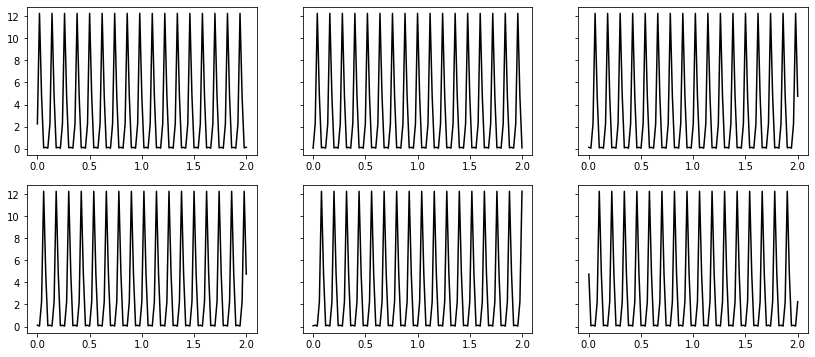

In [11]:
f, ax = plt.subplots(2, 3, sharey=True, figsize=(14,6))
for k in np.arange(3):
    ax[0,k].plot(tvec,unknowns[k,:],'k')
    ax[1,k].plot(tvec,unknowns[2+k,:],'k')

#### Lagrange Formulation of Electric Circuits
Lagrangian: $L = (Kinetic$ $energy) - (Potential$ $energy)$. 

The equation of motion is obtained by Euler-Lagrange equations. These are second order differential equations $q_i(t)$'s:

\begin{equation}
\frac{\partial L}{\partial q_i} - \frac{d }{d t} \frac{\partial L}{\partial d \dot{q}_i} = 0, \quad i \in \{1,2,3,...,N\}
\end{equation}

- q_i: elements of generalized coordinate, 
- p_i: elements of generalized momenta

<br>
<br>
<br>
<br>
<br>

We can generalize Kirshhoff's law to set of matrix relations. 
- Label all the voltages and the currents within a given network into a vector, $\underline{V}, \underline{I}$ or $V_i, I_i$.
<center><img src="image1_2.jpg" width="520"></center>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- Calculate the matrix connecting voltages with currents for the network, $R,G $.
For electric circuits, define the generalize position and momentum variables:

Set 1:
- Position: Charge accumulated at position $x$, $Q(x)$
- Momentum: Rate of change in $Q(x)$, current pass through $x$, $I(x) = \dot{Q}(x)$.

Inductor,    $L_{inductor} = \frac{1}{2} L \dot{Q}^2 - 0 \quad \quad$ Capacitor,    $L_{capacitor} = 0-\frac{1}{2C} Q^2\quad \quad$ Resistor,    $L_{resistor} = \frac{1}{2} R \dot{Q}^2 - 0$

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

   
Set 2: 
- Position: Magnetic flux accumulated at position $x$, $\Phi(x)$ (less frequently used)
- Momentum: Rate of change in $\Phi(x)$, the voltage at $x$, $V(x) = \dot{\Phi}(x)$.


Inductor, $L_{inductor} = 0-\frac{1}{2L} \Phi^2\quad \quad$ Capacitor,    $L_{capacitor} = \frac{1}{2} C \dot{\Phi}^2-0 \quad \quad$ Resistor:
    $L_{resistor} = 0-\frac{1}{2R} \Phi^2$

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Example 1: RLC Circuit

#### Hamiltonian Formulation of Electric Circuits
Hamiltonian is the Legendre transform of the Lagrangian, it is equal to constant energy and as long as the forces are conservative.
\begin{equation}H = p\dot{q} - L(q,\dot{q},t)\end{equation}

For N pairs of variables,

How to obtain the equation of motion? Two 1st order differential equation for $q_i$ and $p_i$,
\begin{equation}\dot{p}_i = -\frac{\partial H}{\partial q_i}, \quad \quad \dot{q}_i = \frac{\partial H}{\partial p_i}, \quad \frac{\partial H}{\partial t} = -\frac{\partial L}{\partial t}\end{equation}

#### Example 1: RLC Circuit (Revisited)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### B. Basics of Quantum Mechanics

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Representations in various basis choices (Optional)
$\langle u \mid$: Bra : A vector of size $1 \times N$ (think of vector $u$ or $\vec{u}$)

$\mid v \rangle$: Ket : A space vector of size $N \times 1$ (think of vector $v^T$ or $\vec{v}$)

$\langle u \mid v \rangle $: inner product, a number (think of $\vec{u}\cdot \vec{v} \equiv u^T v$)


- "It is possible to expand these vectors in another basis". What does it mean? Think of an analogy in cartesian vectors:

1. Consider a vector $\vec{r}$, we can represent it by a set of orthonormal basis vectors $\hat{e}_{x},\hat{e}_{y},\hat{e}_{z}$. 

We have  $\hat{e}_{x} \cdot \hat{e}_{x} = 1$, $\hat{e}_{x} \cdot \hat{e}_{y} = 0$ and in general $\hat{e}_{i} \cdot \hat{e}_{j} = \delta_{ij}$ where $i,j \in \{x,y,z \}$.

It spans 3D space.

$\vec{r} = r_x \hat{e}_{x} + r_y \hat{e}_{y} +  r_z \hat{e}_{z}$. 
We obtain each component by projecting it to orthonormal basis vectors, e.g. $r_x \equiv \vec{r} \cdot \hat{e}_{x}$, $r_y \equiv \vec{r} \cdot \hat{e}_{y}$ etc.

For example, $r_x = 3, r_y= 4, r_z = 5$, 

then $\vec{r} = 3 \hat{e}_{x} + 4 \hat{e}_{y} + 5 \hat{e}_{z}$.

2. We can readily choose another basis, say x-y plane is rotated by $45^o$, then the new basis is: $\hat{e}_{\tilde{x}},\hat{e}_{\tilde{y}},\hat{e}_{\tilde{z}}$, where

\begin{equation}\hat{e}_{\tilde{x}} = \frac{1}{\sqrt{2}} \left(\hat{e}_{x} + \hat{e}_{y}\right),\quad \hat{e}_{\tilde{y}} = \frac{1}{\sqrt{2}} \left(-\hat{e}_{x} + \hat{e}_{y}\right), \quad \hat{e}_{\tilde{z}} = \hat{e}_{z}.\end{equation}

<br>
<br>
<br>
<br>
<br>
<br>
<br>

In the new basis, $\vec{r} = r_\tilde{x} \hat{e}_{\tilde{x}} + r_\tilde{y} \hat{e}_{\tilde{y}} +  r_\tilde{z} \hat{e}_{\tilde{z}}$ where

\begin{equation} r_\tilde{x} = \vec{r} \cdot \hat{e}_{\tilde{x}} = (3 \hat{e}_{x} + 4 \hat{e}_{y} + 5 \hat{e}_{z}) \cdot \frac{1}{\sqrt{2}} \left(\hat{e}_{x} + \hat{e}_{y}\right) = \frac{7}{\sqrt{2}},\end{equation}

\begin{equation} r_\tilde{y} = \vec{r} \cdot \hat{e}_{\tilde{y}} = (3 \hat{e}_{x} + 4 \hat{e}_{y} + 5 \hat{e}_{z}) \cdot \frac{1}{\sqrt{2}} \left(-\hat{e}_{x} + \hat{e}_{y}\right) = \frac{1}{\sqrt{2}}\end{equation}

\begin{equation} r_\tilde{z} = r_z.\end{equation}

Then, $\vec{r} = \frac{7}{\sqrt{2}} \hat{e}_{\tilde{x}} + \frac{1}{\sqrt{2}} \hat{e}_{\tilde{y}} +  5 \hat{e}_{\tilde{z}}$.

In Bra-Ket notation,
$\vec{r} \to \mid \vec{r} \rangle$.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Schrödinger Equation
\begin{eqnarray}
\hat{H}(\vec{r} ) \Psi (\vec{r} ) &=& \left(-\frac{\hbar^2}{2 m} \vec{\nabla}^2 + V(x) \right) \Psi (\vec{r} ) = E \Psi(\vec{r} )
\end{eqnarray}

It is actually the real space basis representation of the Bra-Ket version:
\begin{equation} \hat{H} \mid \Psi \rangle = \left( \frac{\hat{p}^2 }{2 m} + \hat{V} \right)  \mid \Psi \rangle \end{equation} 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- Wavefunction: $\Psi(\vec{r} ) = \langle \vec{r} \mid \Psi \rangle$
- Operators: $-i \hbar \vec{\nabla} = \langle \vec{r} \mid \hat{p} \mid \vec{r} \rangle$


#### Tight-Binding Hamiltonian
Representation of the Schrödinger equation in a localized basis, $1 = \sum \mid \vec{r} \rangle \langle \vec{r} \mid$
\begin{equation} \hat{H} \mid \Psi \rangle = \left( \frac{\hat{p}^2 }{2 m} + \hat{V} \right)  \mid \Psi \rangle \end{equation} 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Example: SSH model vs Telegraph Equation (transmission line)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>